In [11]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Input of dataset
directory_train = 'dataset/train/'
directory_test = 'dataset/test/'
data_train = []
labels = {}
i = 0
for file in os.listdir(directory_train):
    img = cv2.imread(directory_train+file)
    img = cv2.resize(img, (400,400))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    label = file.split('_')
    if label[0] in labels:
        labels[label[0]].append(i)
    else:
        labels[label[0]] = []
        labels[label[0]].append(i)
    i +=1
    data_train.append(img)
data_train = np.asarray(data_train)
print(data_train.shape)

(55, 160000)


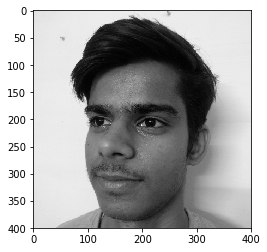

In [13]:
plt.imshow(data_train[15].reshape((400,400)), cmap = 'gray')

In [18]:
# Normalization and Training
mean = np.mean(data_train, axis = 0)
stddev = np.std(data_train, axis = 0)
average_data = (data_train - mean)
covarience = 1 /  len(average_data) * average_data@average_data.T
eigen_vectors,v,d = np.linalg.svd(covarience)
K = 30
Keigen_vectros = eigen_vectors1[:,:K]
eigen_faces = Keigen_vectros.T@average_data
weights = average_data@eigen_faces.T

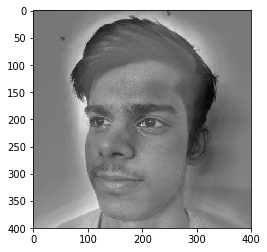

In [19]:
plt.imshow(average_data[15].reshape((400,400)), cmap = 'gray')

In [20]:
# Testing

for file in os.listdir(directory_test):
    img = cv2.imread(directory_test+file)
    img = cv2.resize(img, (400,400))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    average_img = (img - mean)
    weight_img = average_img@eigen_faces.T
    label,_ = file.split('_')
    min_distance = 1e19
    min_index = 0
    for i in range(len(weights)):
        norm = np.linalg.norm(weight_img - weights[i])
        if  norm < min_distance:
            min_distance = norm
            min_index = i
    ans_label = ''
    for key, value in labels.items():
        if min_index in value:
            ans_label = key
    print('Given Image : ' + label)
    print('Predicted Image : ' + ans_label)

Given Image : sidharth
Predicted Image : sidharth
Given Image : Luve
Predicted Image : Luv
Given Image : pasha
Predicted Image : pasha
Given Image : pranav
Predicted Image : pranav
Given Image : Prea
Predicted Image : Luv
Given Image : balaji
Predicted Image : balaji
Given Image : varun
Predicted Image : varun
Given Image : Luvv
Predicted Image : Luv
Given Image : Luv
Predicted Image : Luv
Given Image : praveen
Predicted Image : praveen
Given Image : aswin
Predicted Image : aswin
